## Feeding Forward: 

This notebook covers how we code a neural network in PyTorch and feed data through. We'll be building a Neural Network to recognise digits using the MNIST dataset. I've previously built a neural network for this exact objective from scratch and this notebook will show how easy it is to build this model using PyTorch. 


In [1]:
from torch import nn 
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

Model Params:

In [18]:
input_size = 784
hidden_size = 100
output_size = 10
batch_size = 100
learning_rate = 0.001
number_of_epochs = 2

Import the training data from trochvision: 

In [19]:
train_data = torchvision.datasets.MNIST(root='./', download=True, train=True, 
                transform=torchvision.transforms.ToTensor())

test_data = torchvision.datasets.MNIST(root='./', download=True, 
                transform=torchvision.transforms.ToTensor())

print(f'Number of training Data: {len(train_data)}')
print(f'Number of testing Data: {len(test_data)}')



Number of training Data: 60000
Number of testing Data: 60000


Recall, dataset objects are parsed into DataLoaders. 

In [20]:
train_loader = DataLoader(dataset=train_data, batch_size=batch_size,shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)

EDA: Viewing our data. We can use the iter method to iterate through our DataLoader to view some examples. Each "row" in the data loaders corresponds to a pair: datapoint, label. 

<class 'torch.Tensor'>


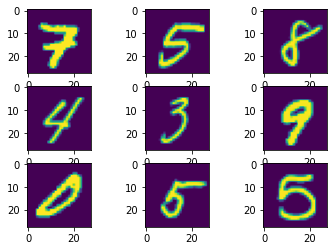

In [5]:
# Iterable object returns from iter. 
iterable = iter(train_loader)
sample = next(iterable)[0]
print((type(sample)))
for i in range(1,10):
    plt.subplot(3,3,i)
    data = sample[i][0]
    plt.imshow(data)

Now we can build the framework of the Neural Network: 

- Creating Model Class by inheriting from nn.module. 
- Need to define the "forward" method, takes in a datapoint and returns the output after feeding forward. 

In [6]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.linear_1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear_2 = nn.Linear(hidden_size, output_size)
        
    
    def forward(self, datapoint):
        feed_1 = self.linear_1(datapoint)
        hidden = self.relu(feed_1)
        output = self.linear_2(hidden)
        # No need to apply another activation function as the Cross-Entropy loss does it. 
        return output 

### Training:

Now that we've defined our Neural network, we can start optimising: We will run the optimisation for 2 Epochs.

In [21]:
loss = nn.CrossEntropyLoss()
model = NeuralNet(input_size, hidden_size, output_size)
optimiser = torch.optim.Adam(model.parameters(),lr=learning_rate)

for epoch in range(1, number_of_epochs+1):
    for batch_no, (batch, labels) in enumerate(train_loader):
        batch_no += 1 
        batch = batch.reshape(-1, input_size)
        predictions = model(batch)
        loss_val = loss(predictions, labels)
        loss_val.backward()
        optimiser.step()
        optimiser.zero_grad()
        if (batch_no+1) % 100 == 0: 
            print(f'For Epoch {epoch}, Batch Number: {batch_no+1}, the CE error is: {loss_val:.2f}')

For Epoch 1, Batch Number: 100, the CE error is: 0.50
For Epoch 1, Batch Number: 200, the CE error is: 0.36
For Epoch 1, Batch Number: 300, the CE error is: 0.41
For Epoch 1, Batch Number: 400, the CE error is: 0.40
For Epoch 1, Batch Number: 500, the CE error is: 0.25
For Epoch 1, Batch Number: 600, the CE error is: 0.24
For Epoch 2, Batch Number: 100, the CE error is: 0.18
For Epoch 2, Batch Number: 200, the CE error is: 0.18
For Epoch 2, Batch Number: 300, the CE error is: 0.28
For Epoch 2, Batch Number: 400, the CE error is: 0.18
For Epoch 2, Batch Number: 500, the CE error is: 0.16
For Epoch 2, Batch Number: 600, the CE error is: 0.20


### Testing:

In [22]:
with torch.no_grad():
    num_correct = 0
    num_samples = 0 
    for images, labels in test_loader:
        reshaped_features = images.reshape(-1, input_size)
        predictions = model(reshaped_features)
        # Recall probabilities aren't outputted after feeding forward, though the max is still
        # representative of the class that it belongs to due to properties of the Softmax function. 
        _, predicted_class = torch.max(predictions, axis=1)
        num_correct += (predicted_class == labels).sum()
        num_samples += reshaped_features.shape[0]

    model_accuracy = num_correct / num_samples * 100
    print(f'The Model Accuracy is: {model_accuracy:.2f}')

The Model Accuracy is: 95.77
